In [1]:
#importing necessary data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [23]:
 pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [25]:
import yfinance as yf 

In [26]:
yf.pdr_override()

[*********************100%***********************]  6 of 6 completed


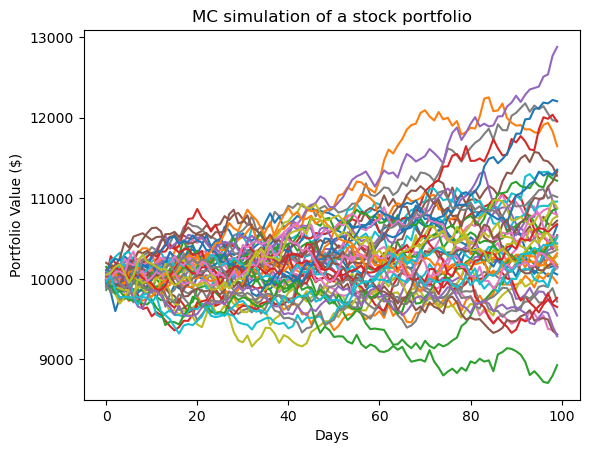

[[10069.49565119 10083.08319021 10148.43427127 ...  9917.71692906
  10049.86871476  9963.711102  ]
 [10063.56901924 10196.12998351 10054.65695261 ...  9957.62907315
  10080.08865832 10031.8520979 ]
 [10176.71785402 10092.57990696 10023.37689221 ... 10026.16507059
  10148.83827824  9862.34228802]
 ...
 [10030.75255194 10068.78551412 10307.95068599 ... 10997.80580581
  10566.04918396 10414.40932544]
 [10083.12263096 10025.63774048 10242.63412019 ... 11037.8316795
  10460.29127294 10425.267014  ]
 [10055.23391981  9948.20041759 10174.69283561 ... 11015.98219113
  10355.47485103 10513.5203793 ]]


In [41]:
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Adj Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
stockList = ['CBA.AX', 'BHP.AX', 'TLS.AX', 'NAB.AX', 'WBC.AX', 'STO.AX']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)    
#print(covMatrix)    

weights = np.random.random(len(meanReturns))
weights/=np.sum(weights)

#MC Sims
mc_sims = 50
T=100
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initial_portfolio = 10000
for m in range(0,mc_sims):
    Z = np.random.normal(size = (T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights,dailyReturns.T)+1) * initial_portfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

print(portfolio_sims)

NameError: name 'stockData' is not defined